In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users\monster\Desktop/NonLinearRegressionModels\RandomForest\Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [4]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [5]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [6]:
# Importance of params: 1) n_estimators
#                       2) amount of variables
#                       3) min_samples_split, max_depth

In [7]:
rf_params = {"max_depth": range(1,10), "max_features": [1,2,5,10], "n_estimators": [200,500,1000,2000], "min_samples_split": [2,10,80,100]}

In [8]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 17.9min finished


In [9]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [14]:
rf_tuned = RandomForestRegressor(max_depth = 8, max_features = 2, min_samples_split = 2, n_estimators = 100, random_state = 42).fit(X_train, y_train)

In [15]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.2787198960803

#Importance level

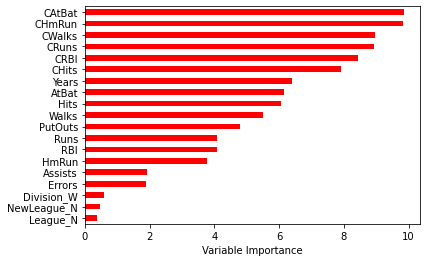

In [17]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100}, index = X_train.columns)

Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r',)

plt.xlabel('Variable Importance')
plt.gca().legend_ = None